# Regresión logística

Una regresión logística surge cunado nuestros datos de entrada X ya tienen una categoría, como por ejemplo que sea sólo True o False, 1 o 0, rojo o verde, etc. Estas son para clasificar más que para predecir como la regresión lineal.

Ahora en vez de tener una línea recta, tenemos una lineal algo curveada en donde antes de la curva sería un false, por ejemplo, y pór arriba de la curva un true. Esta se representa de la siguiente forma:
![GitHub Logo](/work/Regresión Logística y Regresión Lineal/2021-06-25_15h54_45.png)

## Importando nuestras librerías

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Cargando y visualizando nuestro dataset

In [ ]:
dataset = pd.read_csv('/datasets/diabetes/diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

## Asignación de nuestros datos a las variables

In [ ]:
feature_cols = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction'
]

X = dataset[feature_cols]
y = dataset.Outcome

## Dividir los datos de testing y training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Entrenando a nuestro modelo

In [ ]:
# Llamamos a nuestro modelo
log_reg = LogisticRegression()
# Entrenamos a nuestro modelo
log_reg.fit(X_train, y_train)
# Tomamos las predicciones que realiza el modelo
y_pred = log_reg.predict(X_test)

In [ ]:
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


## Matriz de confusión

La matriz de confusión nos permite evaluar el desempeño de un algoritmo de clasificación a partir del conteo de los aciertos y errores en cada una de las clases del algoritmo.

Primero deberemos crear nuestra matriz de confusión, para ello debemos utilizar la función que viene en metrics, a la cual le vamos a pasar los datos de testeo y predicción en nuestro eje y.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

### Graficando nuestra matriz

Text(0.5, 257.44, 'Etiqueta de predicción')

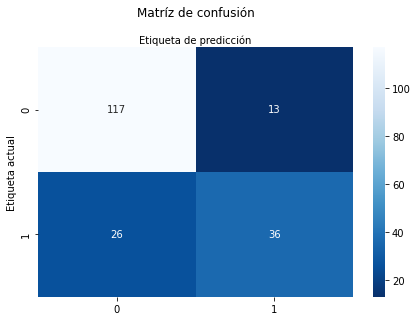

In [ ]:
# Colocamos los nombres de nuestras clases, que serán 1 y 0
class_names = [0, 1]
# Creamos los subplots
fig, ax = plt.subplots()
# Definimos los ejes con sus respectivas etiquetas
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Graficamos nuestra matriz como un heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matríz de confusión', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

Como podemos observar en la gráfica, las intersecciones entre la misma etiqueta son los datos que acertó correctamente nuestro modelo, asignandole la etiqueta que debe. Los otros datos, son a los que se les asignó de manera erronea su etiqueta.

---

Ahora podemos saber el porcentaje de aciertos que tuvo nuestro modelo de regresión logística, y para ello utilizamos igualmente la librería de metrics

In [ ]:
print("Precisión:", metrics.accuracy_score(y_test, y_pred))

Precisión: 0.796875


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad872c02-f972-4050-8982-5e370bea3600' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>